# Low-Pass Filter 

## Low Pass Filter Example

In this example, we design and apply a low pass filter to a noisy signal. The original signal consists of a 5 Hz sine wave with added 50 Hz noise. We use a Butterworth filter with a cutoff frequency of 10 Hz to remove the high-frequency noise.

### Code Explanation

1. **Import Libraries**:
    ```python
    import numpy as np
    from scipy.signal import butter, lfilter
    import matplotlib.pyplot as plt
    ```

2. **Generate a Sample Signal with Noise**:
    - `fs`: Sampling frequency (500 Hz).
    - `t`: Time array for 1 second.
    - `sig`: Signal composed of a 5 Hz sine wave and 50 Hz noise.
    ```python
    fs = 500  # Sampling frequency
    t = np.linspace(0, 1, fs, endpoint=False)
    sig = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 50 * t)  # 5 Hz signal with 50 Hz noise
    ```

3. **Design a Low Pass Filter**:
    - `butter_lowpass(cutoff, fs, order=5)`: Function to design a Butterworth low pass filter.
    - `cutoff`: Cutoff frequency (10 Hz).
    ```python
    def butter_lowpass(cutoff, fs, order=5):
        nyq = 0.5 * fs
        normal_cutoff = cutoff / nyq
        b, a = butter(order, normal_cutoff, btype='low', analog=False)
        return b, a
    ```

4. **Apply the Filter**:
    - `b, a`: Filter coefficients.
    - `filtered_sig`: Filtered signal obtained using the `lfilter` function.
    ```python
    cutoff = 10  # Cutoff frequency in Hz
    b, a = butter_lowpass(cutoff, fs)
    filtered_sig = lfilter(b, a, sig)
    ```

5. **Plot the Signals**:
    - Plot the original noisy signal and the filtered signal for comparison.
    ```python
    plt.plot(t, sig, label='Noisy signal')
    plt.plot(t, filtered_sig, label='Filtered signal', linestyle='--')
    plt.legend()
    plt.show()
    ```

### Graphical Output

- **Noisy Signal**: The original signal (solid line) contains a 5 Hz sine wave with 50 Hz noise.
- **Filtered Signal**: The filtered signal (dashed line) shows the effect of the low pass filter, with the high-frequency noise significantly reduced, resulting in a cleaner 5 Hz sine wave.


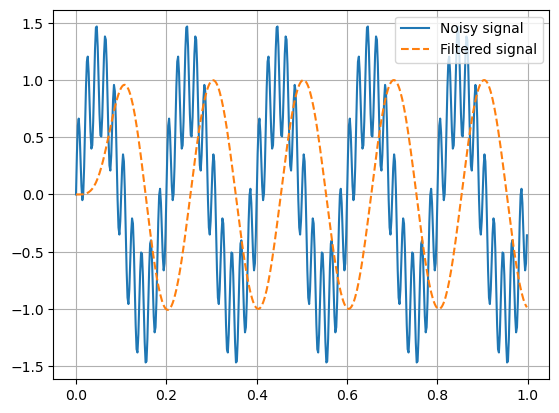

In [1]:
import numpy as np
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt

# Generate a sample signal with noise
fs = 500  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)
sig = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 50 * t)  # 5 Hz signal with 50 Hz noise

# Design a low pass filter
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Apply the filter
cutoff = 10  # Cutoff frequency in Hz
b, a = butter_lowpass(cutoff, fs)
filtered_sig = lfilter(b, a, sig)

# Plot the signals
plt.plot(t, sig, label='Noisy signal')
plt.plot(t, filtered_sig, label='Filtered signal', linestyle='--')
plt.legend()
plt.grid()
plt.savefig("Low Pass Filter.png")
plt.show()


# High Pass Filter

### Difference Between High-Pass and Low-Pass Filter Code

Both the high-pass and low-pass filters are designed using the Butterworth filter from the `scipy.signal` library. However, there are some key differences between the two implementations:

1. **Filter Type**:
    - **Low-Pass Filter**: Allows frequencies below the cutoff frequency to pass through and attenuates frequencies above the cutoff.
    - **High-Pass Filter**: Allows frequencies above the cutoff frequency to pass through and attenuates frequencies below the cutoff.

2. **Filter Design Function**:
    - The low-pass filter uses the function `butter_lowpass()`:
      ```python
      def butter_lowpass(cutoff, fs, order=5):
          nyq = 0.5 * fs
          normal_cutoff = cutoff / nyq
          b, a = butter(order, normal_cutoff, btype='low', analog=False)
          return b, a
      ```
    - The high-pass filter uses the function `butter_highpass()`:
      ```python
      def butter_highpass(cutoff, fs, order=5):
          nyq = 0.5 * fs
          normal_cutoff = cutoff / nyq
          b, a = butter(order, normal_cutoff, btype='high', analog=False)
          return b, a
      ```
    - The key difference here is the `btype` parameter, which is set to `'low'` for low-pass filters and `'high'` for high-pass filters.

3. **Cutoff Frequency**:
    - In the low-pass filter example, the cutoff frequency was set to 10 Hz:
      ```python
      cutoff = 10  # Cutoff frequency in Hz
      ```
    - In the high-pass filter example, the cutoff frequency is set to 30 Hz:
      ```python
      cutoff = 30  # Cutoff frequency in Hz
      ```

4. **Output Signal**:
    - **Low-Pass Filter**: The output signal (`filtered_sig`) has the high-frequency noise (50 Hz) attenuated, allowing the lower-frequency component (5 Hz) to pass.
    - **High-Pass Filter**: The output signal (`filtered_sig`) has the low-frequency component (5 Hz) attenuated, allowing the higher-frequency noise (50 Hz) to pass.

5. **Graphical Output**:
    - The plots for both filters show the original signal and the filtered signal, illustrating the effect of the respective filters on the input signal. In the low-pass filter plot, the high-frequency noise is removed, while in the high-pass filter plot, the low-frequency component is removed.

These differences highlight how the choice of filter type (`low` vs. `high`) and cutoff frequency determines which parts of the signal are passed through and which are attenuated.


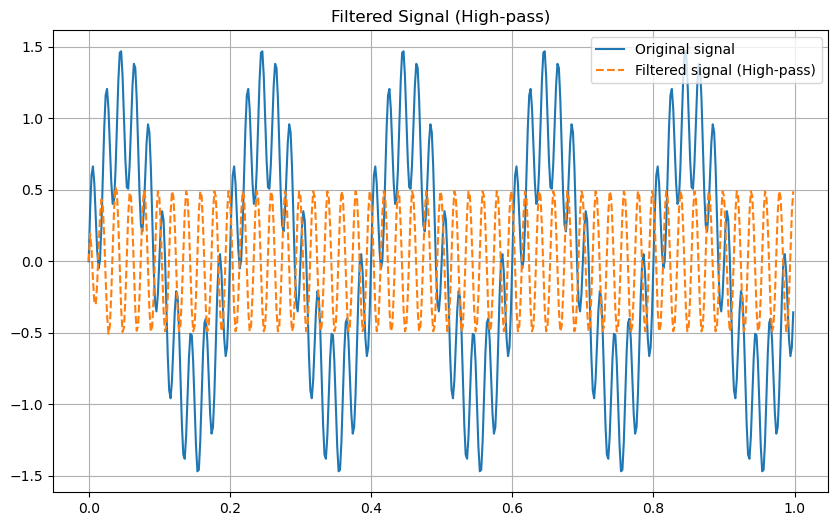

In [2]:
# Generate a sample signal with low-frequency noise
fs = 500  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)
sig = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 50 * t)  # 5 Hz signal with 50 Hz noise

# Design a high-pass filter
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

# Apply the filter
cutoff = 30  # Cutoff frequency in Hz
b, a = butter_highpass(cutoff, fs)
filtered_sig = lfilter(b, a, sig)

# Plot the signals
plt.figure(figsize=(10, 6))

#plt.subplot(2, 1, 1)
plt.plot(t, sig, label='Original signal')
plt.legend()
plt.title('Original Signal')

#plt.subplot(2, 1, 2)
plt.plot(t, filtered_sig, label='Filtered signal (High-pass)', linestyle='--')
plt.legend()
plt.title('Filtered Signal (High-pass)')
plt.grid()
plt.savefig("High Pass filter.png")
plt.show()


# Band Pass Filter

### Difference Between Band-Pass Filter and High-Pass Filter Code

The key differences between the band-pass filter code and the high-pass filter code are:

1. **Filter Design Function**:
    - The high-pass filter uses the function `butter_highpass()`, which sets the `btype` parameter to `'high'`.
    - The band-pass filter uses the function `butter_bandpass()`, which sets the `btype` parameter to `'band'`:
      ```python
      def butter_bandpass(lowcut, highcut, fs, order=5):
          nyq = 0.5 * fs
          low = lowcut / nyq
          high = highcut / nyq
          b, a = butter(order, [low, high], btype='band')
          return b, a
      ```
    - The `butter_bandpass` function requires two cutoff frequencies (`lowcut` and `highcut`) to define the band of frequencies that will be allowed to pass.

2. **Cutoff Frequencies**:
    - The high-pass filter code specifies a single cutoff frequency (`cutoff`).
    - The band-pass filter code specifies two cutoff frequencies (`lowcut` and `highcut`):
      ```python
      lowcut = 20  # Lower cutoff frequency in Hz
      highcut = 80  # Upper cutoff frequency in Hz
      ```

3. **Filtering**:
    - The high-pass filter attenuates frequencies below the cutoff frequency.
    - The band-pass filter attenuates frequencies outside the specified band, allowing frequencies between `lowcut` and `highcut` to pass.

These differences illustrate how the choice of filter type (`high` vs. `band`) and the number of cutoff frequencies determine which parts of the signal are passed through and which are attenuated.


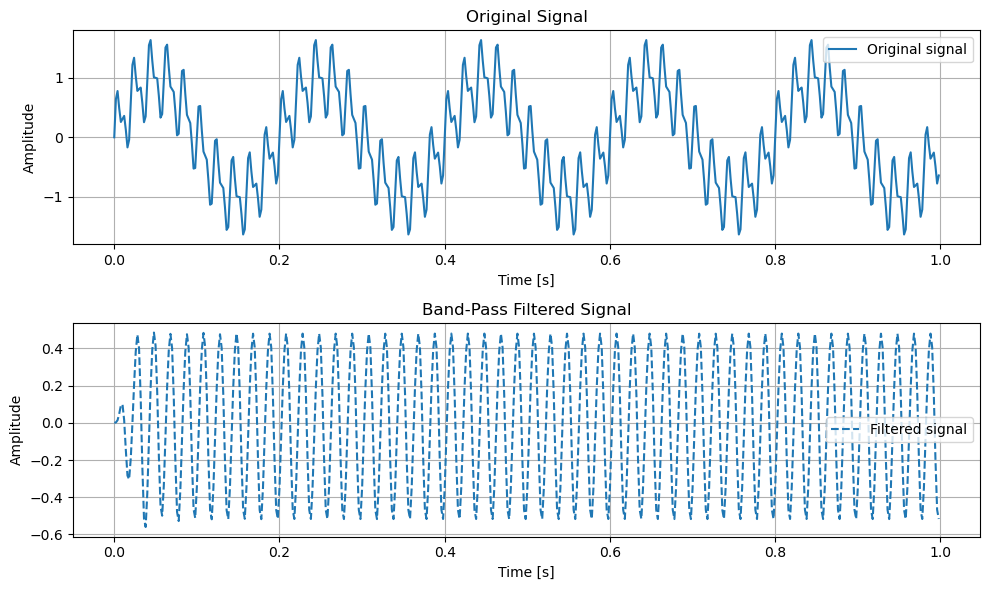

In [3]:
# Generate a sample signal with multiple frequencies
fs = 500  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)
sig = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 50 * t) + 0.3 * np.sin(2 * np.pi * 100 * t)  # 5 Hz, 50 Hz, and 100 Hz signals

# Design a band-pass filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Apply the band-pass filter
lowcut = 20  # Lower cutoff frequency in Hz
highcut = 80  # Upper cutoff frequency in Hz
b, a = butter_bandpass(lowcut, highcut, fs)
filtered_sig = lfilter(b, a, sig)

# Plot the signals
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, sig, label='Original signal')
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.grid()
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, filtered_sig, label='Filtered signal', linestyle='--')
plt.title('Band-Pass Filtered Signal')
plt.xlabel('Time [s]')
plt.grid()
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.savefig("Band Pass.png")
plt.show()


# Band Stop 

### Difference Between Band-Stop and Band-Pass Filters

The key difference between the band-stop and band-pass filter implementations lies in the filter type (`btype`) specified in the `butter` function. 

- **Band-Stop Filter**: Designed to attenuate frequencies within a specified range while allowing frequencies outside this range to pass. This is achieved using `btype='bandstop'` in the `butter` function.
- **Band-Pass Filter**: Designed to allow frequencies within a specified range to pass while attenuating frequencies outside this range. This is achieved using `btype='band'` in the `butter` function.

In the code, the `butter_bandstop` function is used to create the band-stop filter, and the frequency range to be attenuated is specified by `lowcut` and `highcut`.


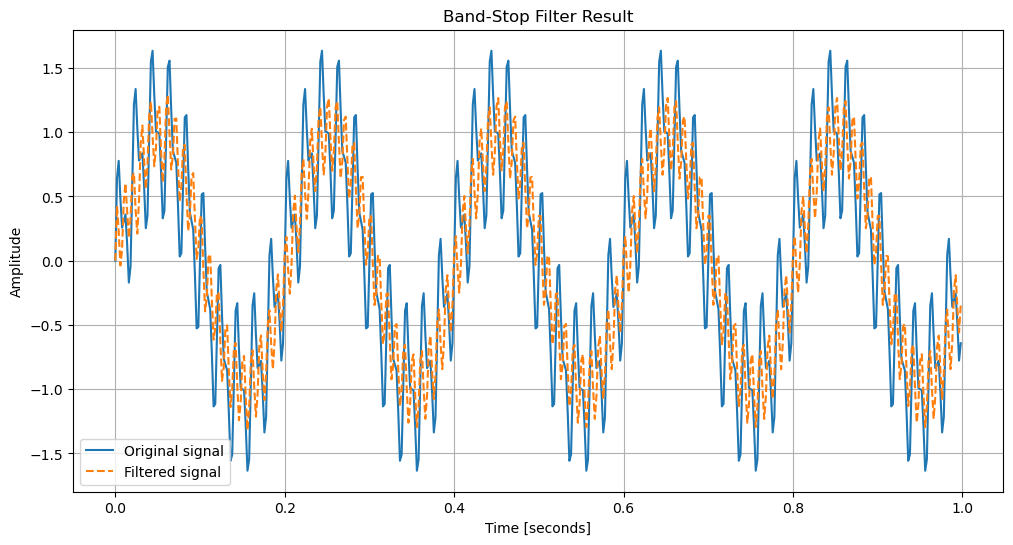

In [4]:
# Design a band-stop filter
def butter_bandstop(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='bandstop')
    return b, a

# Apply the filter
lowcut = 40  # Lower cutoff frequency in Hz
highcut = 60  # Upper cutoff frequency in Hz
b, a = butter_bandstop(lowcut, highcut, fs)
filtered_sig = lfilter(b, a, sig)

# Plot the signals
plt.figure(figsize=(12, 6))
plt.plot(t, sig, label='Original signal')
plt.plot(t, filtered_sig, label='Filtered signal', linestyle='--')
plt.legend()
plt.title('Band-Stop Filter Result')
plt.xlabel('Time [seconds]')
plt.ylabel('Amplitude')
plt.grid()
plt.savefig("Band Stop.png")
plt.show()


# Sampling and Nyqvist

This Python code demonstrates the importance of the Nyquist theorem by graphically showing the effects of different sampling rates on a continuous sine wave signal. The code:
1. Generates a continuous 5 Hz sine wave.
2. Samples this sine wave at different rates: 50 Hz, 20 Hz, and 10 Hz.
3. Plots the continuous signal and the sampled signals to visualize how sampling at different rates affects the accuracy of signal representation.

The code uses `numpy` for signal generation and `matplotlib` for plotting.


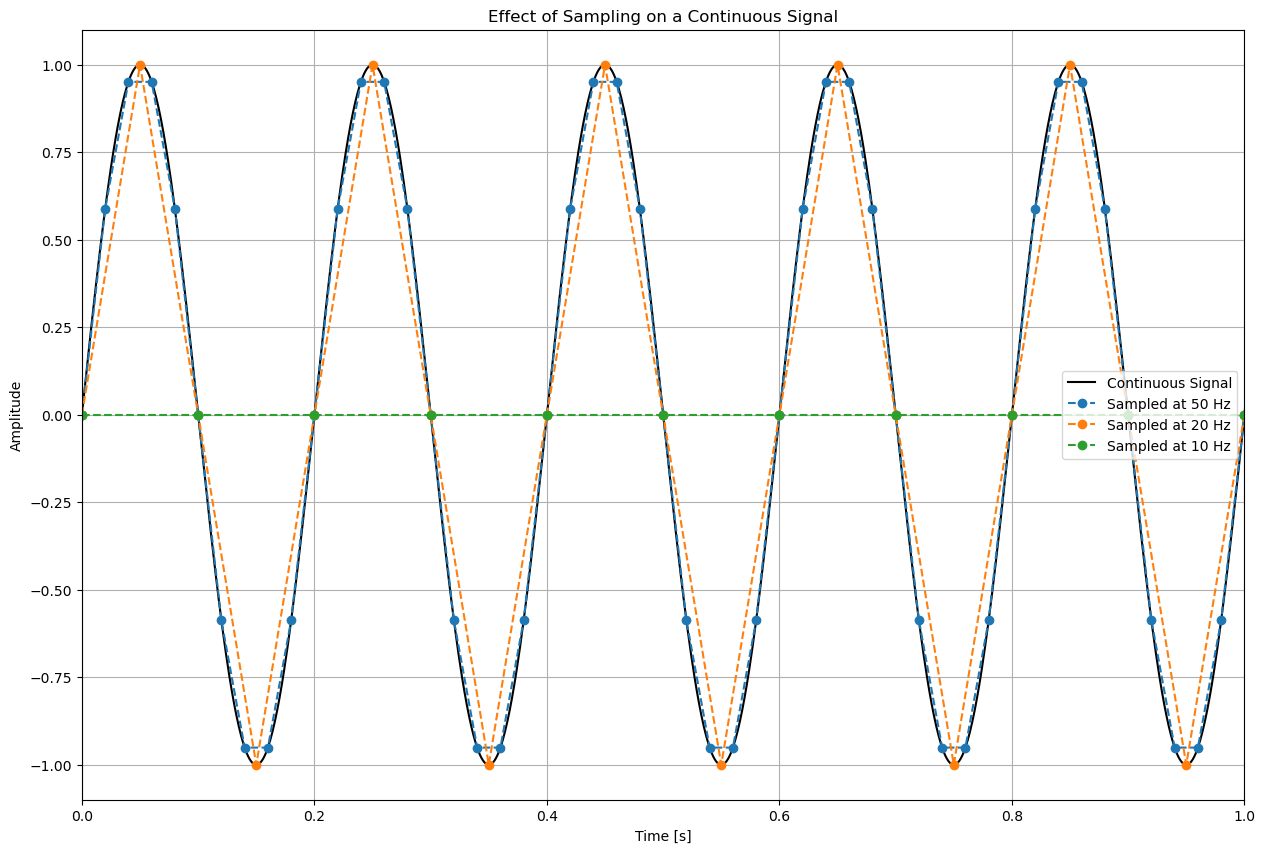

In [19]:
# Generate a continuous signal (a sine wave)
def generate_continuous_signal(freq, duration, sampling_rate):
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    signal = np.sin(2 * np.pi * freq * t)
    return t, signal

# Sample the continuous signal at a given sampling rate
def sample_signal(t, signal, sampling_rate, original_sampling_rate):
    sampling_interval = int(original_sampling_rate / sampling_rate)
    sampled_t = t[::sampling_interval]
    sampled_signal = signal[::sampling_interval]
    return sampled_t, sampled_signal

# Plot the continuous and sampled signals
def plot_signals(t, signal, sampled_signals, sampling_rates):
    plt.figure(figsize=(15, 10))
    
    plt.plot(t, signal, label='Continuous Signal', color='black')
    
    for i, (sampled_t, sampled_signal) in enumerate(sampled_signals):
        plt.plot(sampled_t, sampled_signal, label=f'Sampled at {sampling_rates[i]} Hz', linestyle='--', marker='o')
    
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.title('Effect of Sampling on a Continuous Signal')
    plt.legend()
    plt.grid(True)
    plt.xlim([0,1])
    plt.savefig("Aliaising and Nyquist.png")
    plt.show()

# Parameters
frequency = 5  # frequency of the sine wave (Hz)
duration = 2  # duration of the signal (seconds)
original_sampling_rate = 1000  # original continuous sampling rate (Hz)

# Generate the continuous signal
t, continuous_signal = generate_continuous_signal(frequency, duration, original_sampling_rate)

# Define different sampling rates for demonstration
sampling_rates = [50, 20, 10]  # Hz
sampled_signals = [sample_signal(t, continuous_signal, sr, original_sampling_rate) for sr in sampling_rates]

# Plot the signals
plot_signals(t, continuous_signal, sampled_signals, sampling_rates)


# FFT 

### Brief Description of the Code

This Python code demonstrates the application of the Fast Fourier Transform (FFT) to analyze a signal in the frequency domain. The code:

1. Generates a time-domain signal consisting of two sine waves with frequencies of 50 Hz and 120 Hz.
2. Computes the FFT of the signal to transform it into the frequency domain.
3. Plots both the original time-domain signal and the frequency-domain representation.

The time-domain plot shows the variation of the signal over time, while the frequency-domain plot reveals the individual frequency components present in the signal. The FFT allows for efficient and insightful analysis of the signal's frequency content.


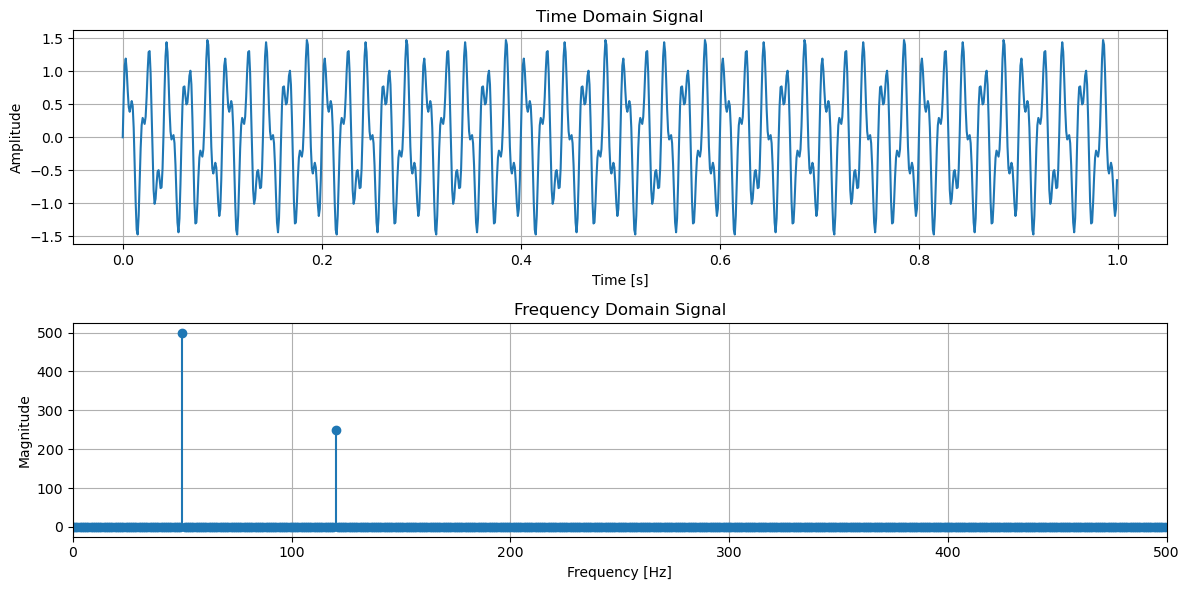

In [24]:
# Generate a sample signal: a sum of two sine waves
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)
f1, f2 = 50, 120  # Frequencies of the sine waves
signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# Compute the FFT
fft_result = np.fft.fft(signal)
fft_freq = np.fft.fftfreq(len(fft_result), 1/fs)

# Plot the original signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.grid()
plt.title('Time Domain Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Plot the FFT result (magnitude)
plt.subplot(2, 1, 2)
plt.stem(fft_freq, np.abs(fft_result), basefmt=" ")
plt.title('Frequency Domain Signal')
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.ylabel('Magnitude')
plt.xlim(0, fs/2)  # Plot only positive frequencies
plt.tight_layout()
plt.savefig("FFT.png")
plt.show()


# Windowing

### Brief Description of the Code

This Python code demonstrates the application of windowing in digital signal processing (DSP) to mitigate spectral leakage when performing a Fourier Transform. The code:

1. Generates a time-domain signal consisting of two sine waves with frequencies of 50 Hz and 120 Hz.
2. Applies a Hamming window to the signal to taper its edges.
3. Computes the FFT of both the original and windowed signals.
4. Plots the original and windowed time-domain signals, and compares their frequency-domain representations.

The time-domain plots show the original and windowed signals, with the windowed signal having tapered edges. The frequency-domain plot reveals how the Hamming window reduces spectral leakage, resulting in a clearer frequency spectrum.


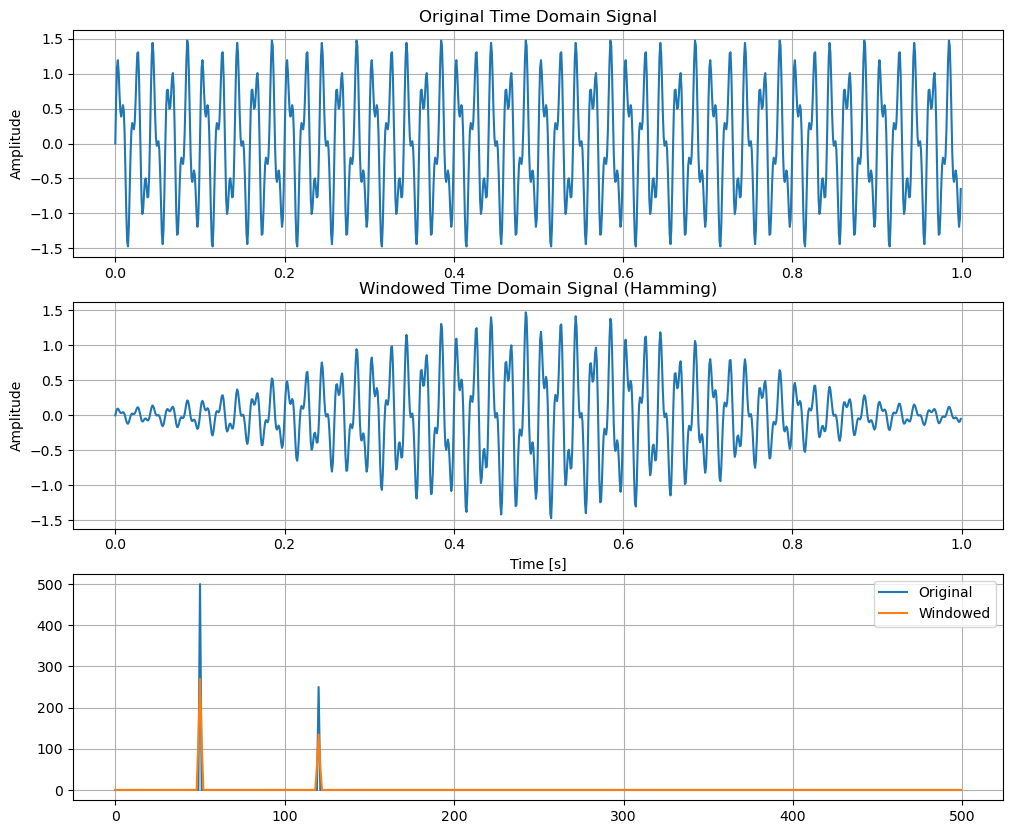

In [30]:
from scipy.signal import windows

# Generate a sample signal: a sum of two sine waves
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)
f1, f2 = 50, 120  # Frequencies of the sine waves
signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# Apply a Hamming window
window = windows.hamming(fs)
windowed_signal = signal * window

# Compute the FFT of the original and windowed signal
fft_result = np.fft.fft(signal)
fft_windowed_result = np.fft.fft(windowed_signal)
fft_freq = np.fft.fftfreq(len(fft_result), 1/fs)

# Plot the original and windowed signals
plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
plt.plot(t, signal)
plt.title('Original Time Domain Signal')
#plt.xlabel('Time [s]')
plt.grid()
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(t, windowed_signal)
plt.title('Windowed Time Domain Signal (Hamming)')
plt.xlabel('Time [s]')
plt.grid()
plt.ylabel('Amplitude')

# Plot the FFT results
plt.subplot(3, 1, 3)
plt.plot(fft_freq[:fs//2], np.abs(fft_result[:fs//2]), label='Original')
plt.plot(fft_freq[:fs//2], np.abs(fft_windowed_result[:fs//2]), label='Windowed')
plt.grid()
plt.savefig("Windowing.png")
plt.legend()


# Convolution 

### Brief Description of the Code

This Python code demonstrates the application of convolution and correlation in digital signal processing (DSP). The code:

1. Generates two time-domain signals: a 50 Hz sine wave and a 120 Hz sine wave.
2. Computes the convolution of the two signals to show how one signal modifies the shape of the other.
3. Computes the correlation of the two signals to measure their similarity as a function of time shift.
4. Plots the original signals, the convolved signal, and the correlated signal.

The time-domain plots show the original signals, the result of their convolution, and their correlation. The convolution plot demonstrates how one signal modifies another, while the correlation plot indicates the similarity between the two signals over time.


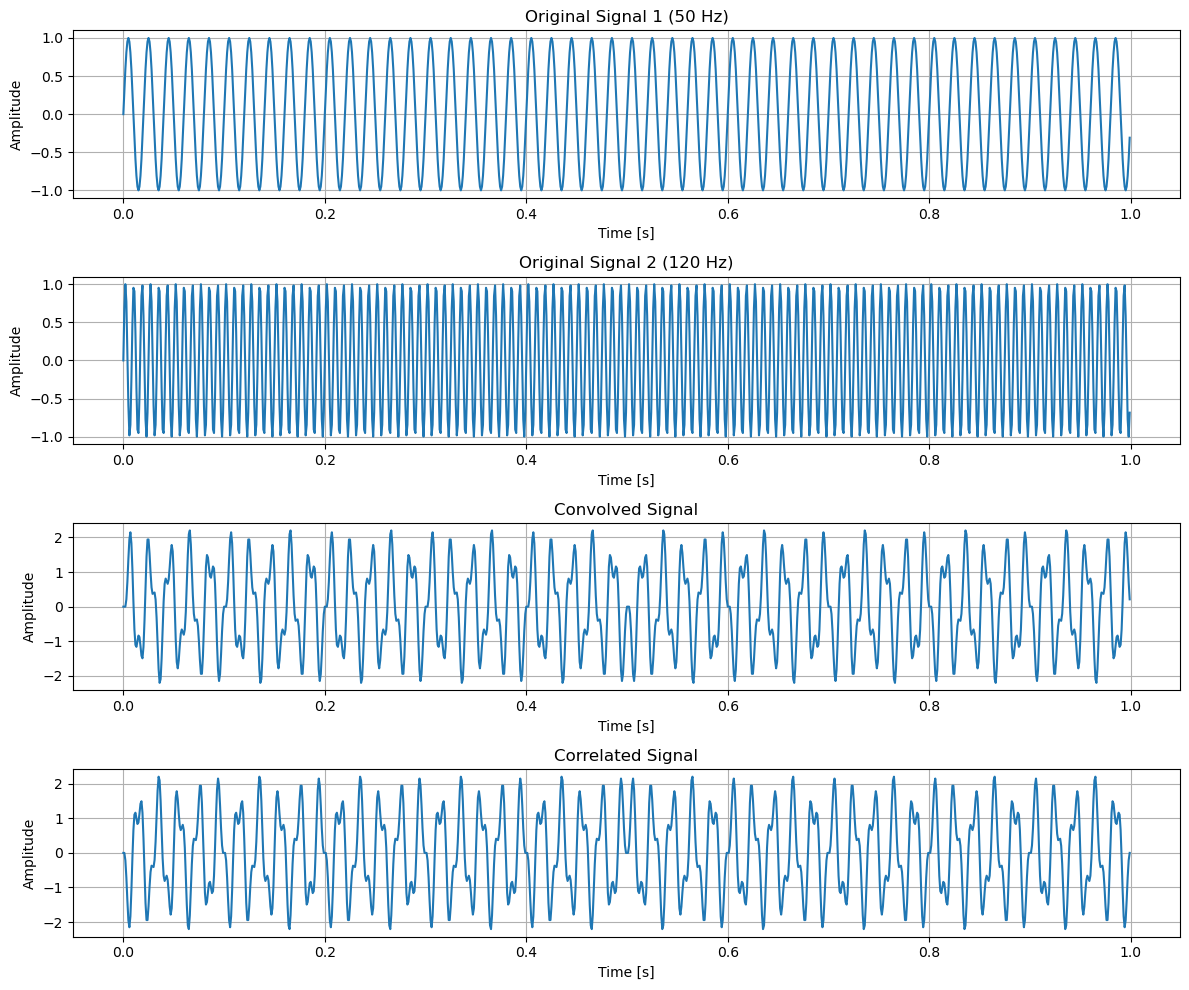

In [34]:
# Generate two sample signals
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)
signal1 = np.sin(2 * np.pi * 50 * t)  # 50 Hz sine wave
signal2 = np.sin(2 * np.pi * 120 * t)  # 120 Hz sine wave

# Convolution of the two signals
convolved_signal = np.convolve(signal1, signal2, mode='same')

# Correlation of the two signals
correlated_signal = np.correlate(signal1, signal2, mode='same')

# Plot the original signals
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(t, signal1)
plt.title('Original Signal 1 (50 Hz)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(4, 1, 2)
plt.plot(t, signal2)
plt.title('Original Signal 2 (120 Hz)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()

# Plot the convolved signal
plt.subplot(4, 1, 3)
plt.plot(t, convolved_signal)
plt.title('Convolved Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()

# Plot the correlated signal
plt.subplot(4, 1, 4)
plt.plot(t, correlated_signal)
plt.title('Correlated Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.savefig("convolution.png")
plt.show()

# Quantization 

### Brief Description of the Code

This Python code demonstrates the process of quantization in digital signal processing (DSP). The code:

1. Generates a continuous-time signal (a 5 Hz sine wave).
2. Samples the signal at regular intervals.
3. Quantizes the sampled signal to 16 discrete levels.
4. Plots the original continuous signal, the sampled signal, and the quantized signal.

The time-domain plots show how the continuous signal is approximated by discrete levels during the quantization process, introducing quantization noise. This illustrates the fundamental concept of converting analog signals to digital form.


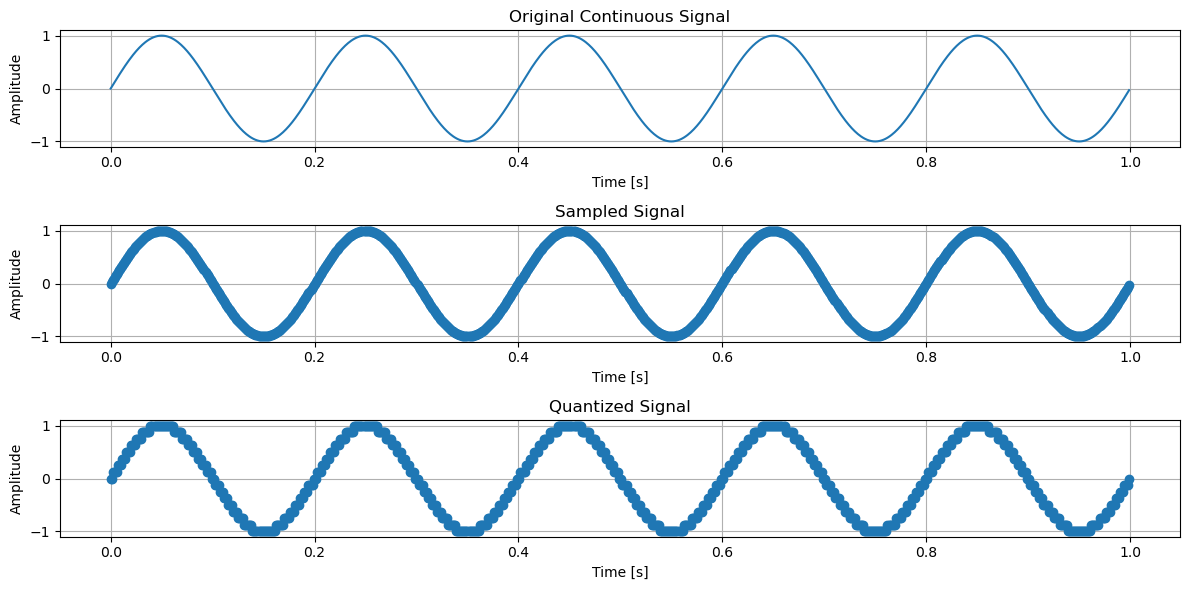

In [37]:
# Generate a continuous signal (sine wave)
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)
original_signal = np.sin(2 * np.pi * 5 * t)  # 5 Hz sine wave

# Sample the signal
sampled_signal = original_signal

# Quantize the signal
quantization_levels = 16
quantization_step = 2 / quantization_levels  # Assuming the signal range is from -1 to 1
quantized_signal = np.round(sampled_signal / quantization_step) * quantization_step

# Plot the signals
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.grid()
plt.plot(t, original_signal)
plt.title('Original Continuous Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.grid()
plt.plot(t, sampled_signal, 'o-')
plt.title('Sampled Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.grid()
plt.plot(t, quantized_signal, 'o-')
plt.title('Quantized Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.savefig('quantization_plot.png')
plt.show()
